Different morphologies of the same neuron type might require different activation to reach comparable firing frequency. InputScaling simulates a network of a neuron type with different number of inputs, and different frequency to infer what level of input is needed.

Here we look at the input to ```neuron_types="fs"```.

During a simulation we can vary the input frequency, but not the number of inputs coupled to a neuron, so we use a set of ```num_replicas``` copies of each morphology, each receiving a different number of inputs from ```num_input_min``` to ```num_input_max``` of a given ```input_type``` (e.g. for striatum "cortical" or "thalamic"). 

A set of input frequencies are tested, specified by ```input_frequency_range```, and each of these frequencies is run for ```input_duration``` seconds. In this example we create a small example, but we recommend that use use a longer input duration (e.g. 10 seconds, or possibly more).

In [1]:
import os
from snudda.input.input_tuning import InputTuning
network_path = os.path.join("networks", "input_tuning_fs_cortical")
input_tuning = InputTuning(network_path)

We create a network without any synapses and connect different number of external inputs to the neurons. Each neuron then receives a range of input frequencies. Here ```neurons_path``` points to the folder that contains all the different neuron types. Note that we use ```$DATA``` to refer to the ```snudda/data``` folder, but you can use an absolute path instead if you have your own neurons folder. If you use your own neurons you probably want to compile the neuron mechanisms from another folder when calling ```nrnivmodl``` below.

Also note that the folder names for the different neurons must be lowercase.

In [2]:
neurons_path = os.path.join("$DATA", "neurons", "striatum")
input_tuning.setup_network(neurons_path=neurons_path, 
                           num_replicas=20,
                           neuron_types="fs")
input_tuning.setup_input(input_type="cortical",  # eg. "cortical" or "thalamic"
                         num_input_min=10,
                         num_input_max=500,
                         input_duration=2.0,
                         input_frequency_range=[1.0, 2.0, 3.0, 5.0, 10.0])

Skipping neuron type lts
Skipping neuron type dspn
Skipping neuron type ispn
Skipping neuron type chin
Found 4 neurons in /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Instantiates par_id = 0
morph_tag = MTC180800A-IDB-cor-rep.swc
Instantiates par_id = 1
Instantiates par_id = 2
Instantiates par_id = 3
Instantiates par_id = 0
morph_tag = MTC180800A-IDB-cor-rep.swc
Instantiates par_id = 0
morph_tag = MTC251001A-IDB-cor-rep.swc
Instantiates par_id = 0
morph_tag = DR-rat-Mar-13-08-1-536-R-cor-rep.swc
Instantiates par_id = 1
Instantiates par_id = 2
Instantiates par_id = 3
Writing network config file to networks/input_tuning/network-config.json
No d_view specified, running distribute neurons in serial
No connections specified in connectivity_distribution.
Using cortical synapse density for input.
Loading 80 neurons with 0 synapses and 0 gap junctions
Writing spikes to networks/input_tuning/input.hdf5


In [3]:
from snudda.input import SnuddaInput

si = SnuddaInput(input_config_file=input_tuning.input_config_file,
                 hdf5_network_file=input_tuning.network_file,
                 spike_data_filename=input_tuning.input_spikes_file,
                 time=input_tuning.max_time)
si.generate()

Writing spikes to networks/input_tuning/input.hdf5


In [ ]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

## For large runs, to simulate in parallel use:

```mpiexec -n 4 python3 ../../snudda/input/input_tuning.py simulate networks/input_tuning/```

If you have more than four cores available on your machine, increase the number of workers accordingly.

## Below we just run it in serial in the notebook:

In [ ]:
input_tuning.simulate()

## Analyse results

Loading 80 neurons with 0 synapses and 0 gap junctions


<IPython.core.display.Javascript object>


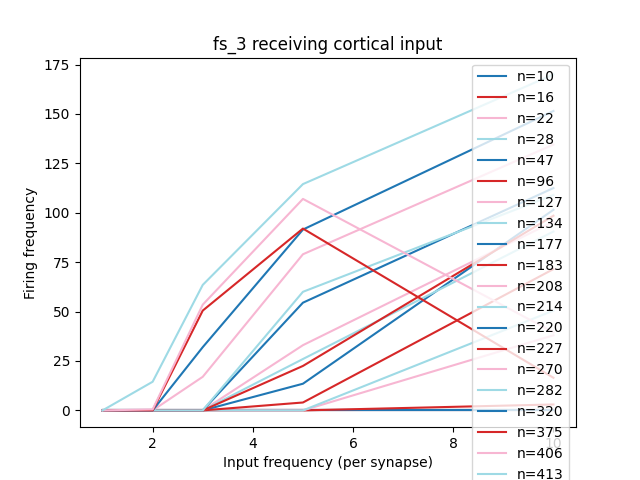

<IPython.core.display.Javascript object>


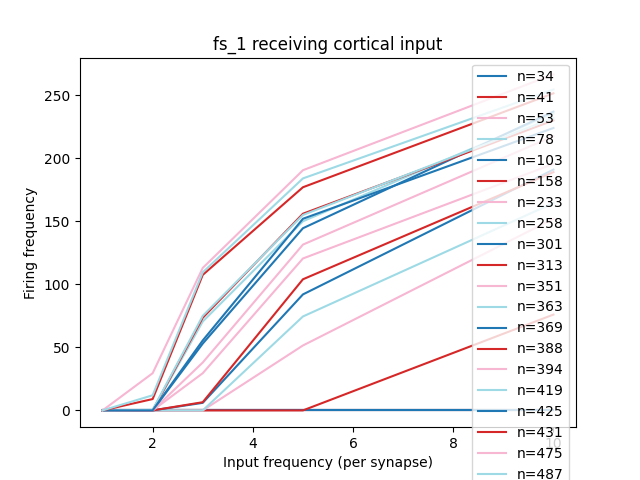

<IPython.core.display.Javascript object>


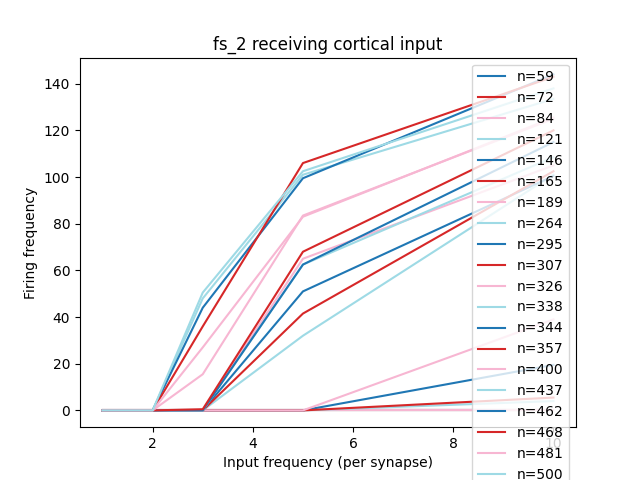

<IPython.core.display.Javascript object>


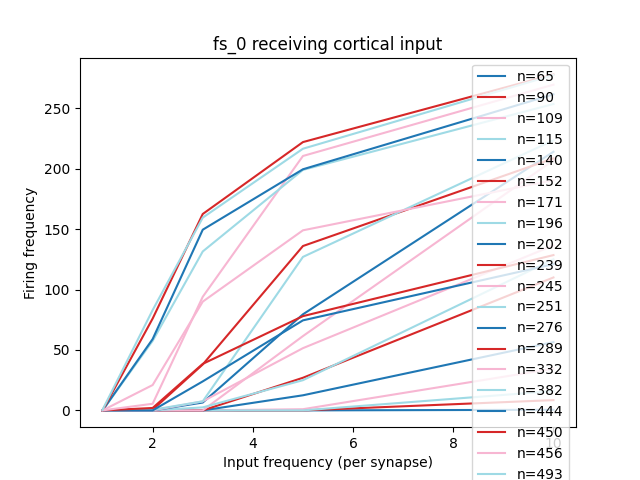

<IPython.core.display.Javascript object>


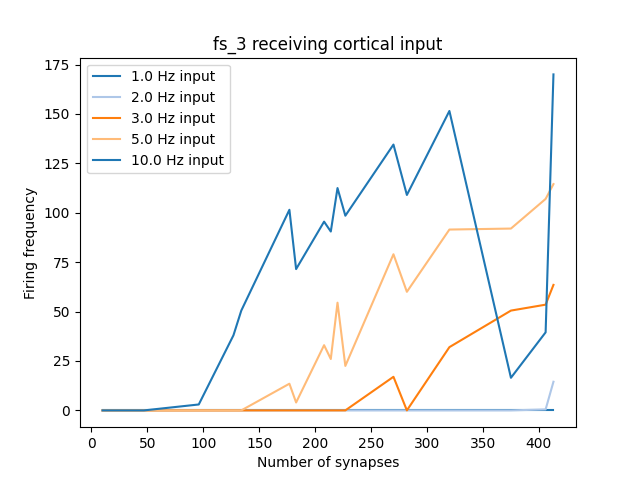

<IPython.core.display.Javascript object>


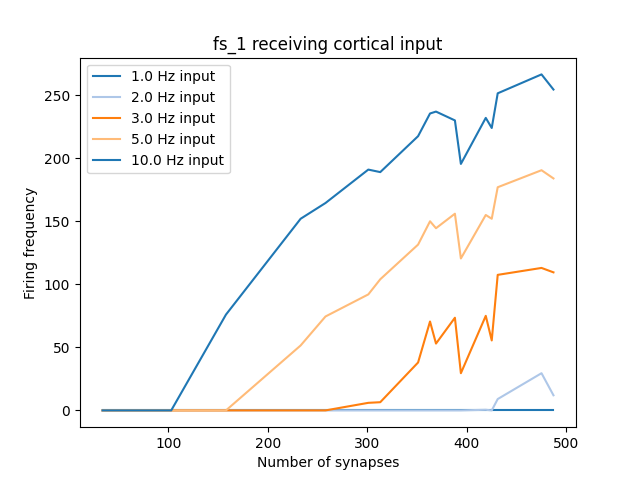

<IPython.core.display.Javascript object>


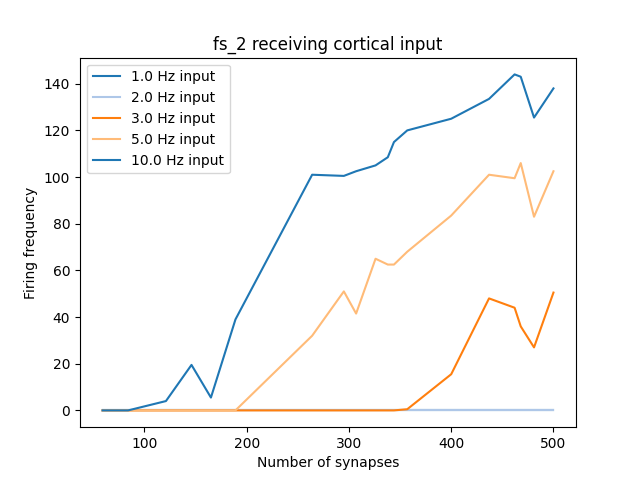

<IPython.core.display.Javascript object>


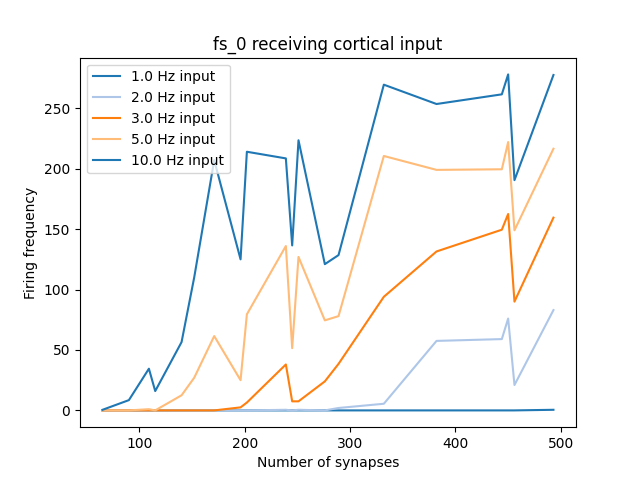

<IPython.core.display.Javascript object>


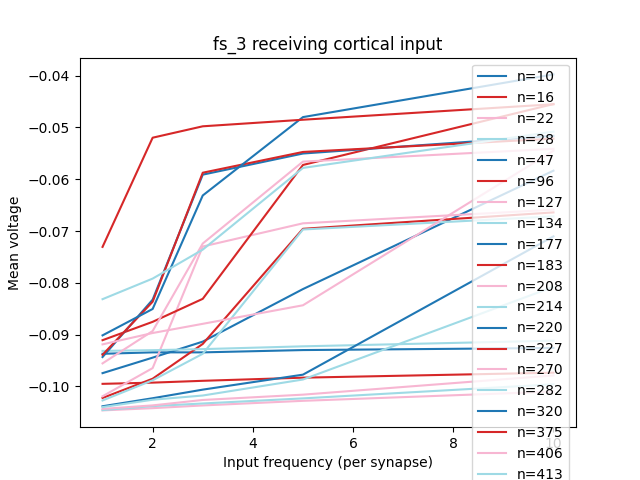

<IPython.core.display.Javascript object>


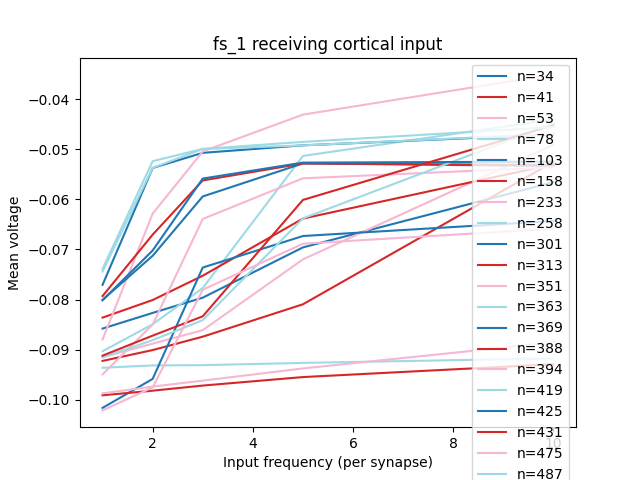

<IPython.core.display.Javascript object>


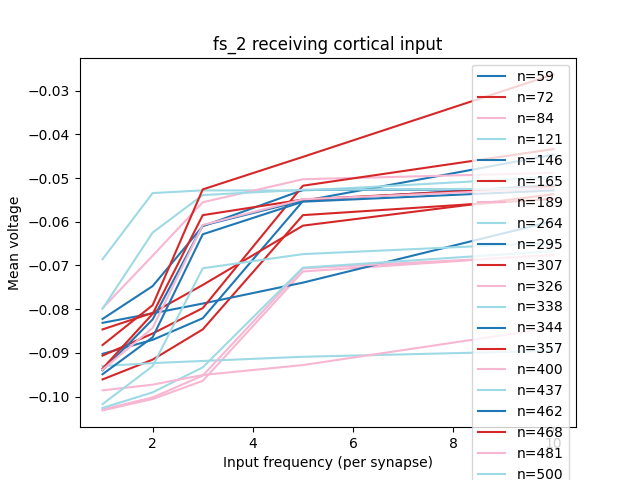

<IPython.core.display.Javascript object>


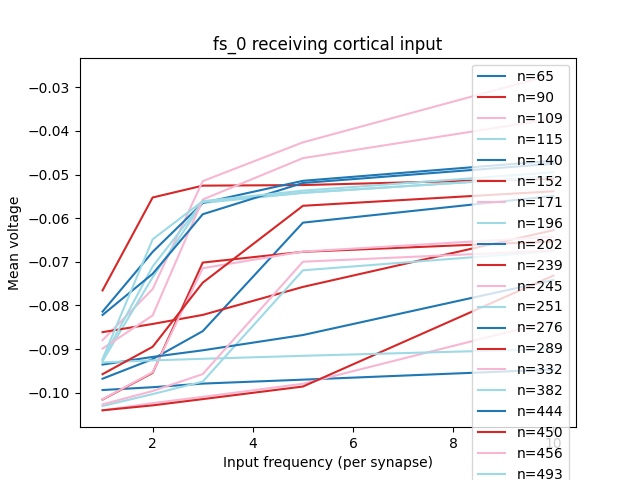

To plot traces:
python3 plotting/Network_plot_traces.py networks/input_tuningoutput_volt.txt networks/input_tuningnetwork-synapses.hdf5 


In [4]:
%matplotlib notebook

input_tuning.analyse_results(show_plots=True)